# Student Performace Indicator


#### Life Cycle of Machine Learning Project

2.1 Importing all the necessary libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('StudentsPerformance.csv')

### Top 5 rows

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset

In [5]:
df.shape

(1000, 8)

### 3.1 Checking missing values in each columns

In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### 3.2 Check Duplicates

In [7]:
df.duplicated().sum()

0

we can see no missing values and no duplicate data we have

### 3.3 Checking data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 checking no.of category in each column

In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 3.5 checking statstics of dataset

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### insight

### 3.7 Exploring Data

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
print("Categories in 'gender' : ",end = " ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' : ",end=" ")
print(df['race/ethnicity'].unique())

print("categories in 'Parental level of education ': ",end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' :",end=" ")
print(df['lunch'].unique())

print("Categroies in 'test preparation course':",end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' :  ['female' 'male']
Categories in 'race/ethnicity' :  ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'Parental level of education ':  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' : ['standard' 'free/reduced']
Categroies in 'test preparation course': ['none' 'completed']


In [13]:
## Defining numerical and categorical columns
numeric_features=[feature for feature in df.columns if df[feature].dtype !='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

print("We have {} numerical Features : {}".format(len(numeric_features),numeric_features))

print("We have {} categorical Features : {}".format(len(categorical_features),categorical_features))


We have 3 numerical Features : ['math score', 'reading score', 'writing score']
We have 5 categorical Features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [14]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### 3.8 Adding columns for "total_Score" and average


In [15]:
df['total_score']=df['math score']+df['reading score']+df['writing score']
df['average']=df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
## calculating student whose score is 100 
reading_full=df[df['reading score']==100]['average'].count()
writing_full=df[df['writing score']==100]['average'].count()
math_full=df[df['math score']==100]['average'].count()

print("Number if Student with full marks in math :{}".format(math_full))
print("Number if Student with full marks in reading :{}".format(reading_full))
print("Number if Student with full marks in writing :{}".format(writing_full))

Number if Student with full marks in math :7
Number if Student with full marks in reading :17
Number if Student with full marks in writing :14


In [17]:
## Calculating number of student whose score is 20 or less than 20
reading_less_20=df[df['reading score']<=20]['average'].count()
writing_less_20=df[df['writing score']<=20]['average'].count()
math_less_20=df[df['math score']<=20]['average'].count()

print("Number if Student with less than 20 marks in math :{}".format(math_less_20))
print("Number if Student with less than 20 marks in reading :{}".format(reading_less_20))
print("Number if Student with less than 20 marks in writing :{}".format(writing_less_20))

Number if Student with less than 20 marks in math :4
Number if Student with less than 20 marks in reading :1
Number if Student with less than 20 marks in writing :3


####  insight

from the above info we can clearly see that student have best perform in reading  and worst perform in math

### Exploring Data (Visualization)

#### 4.1 visualize avg score ditribution to make prediction

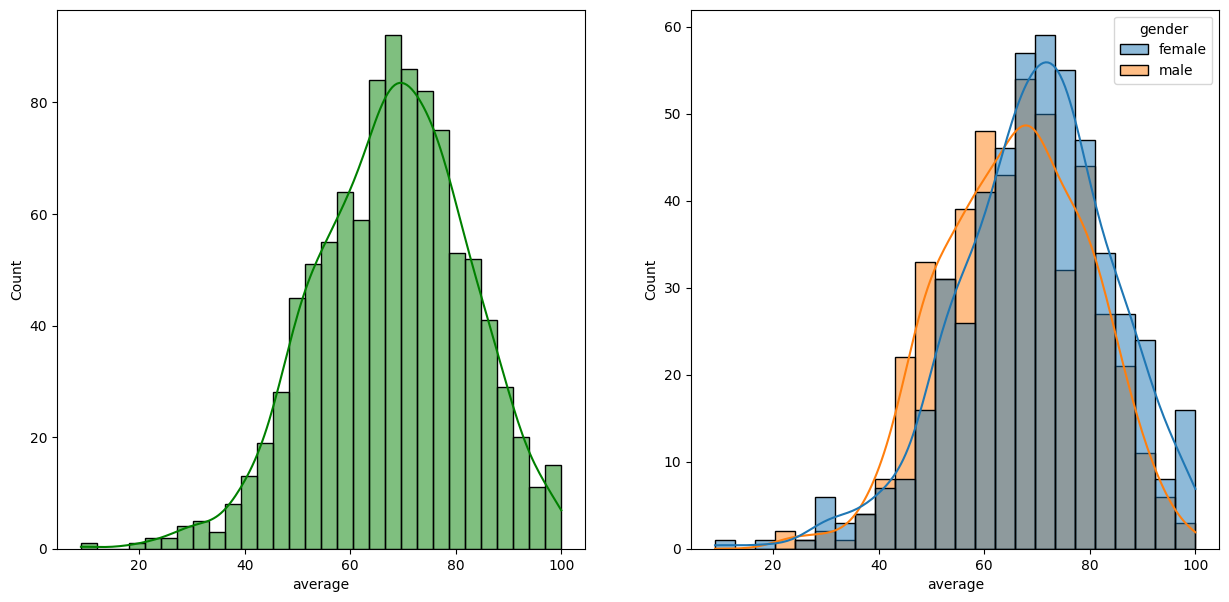

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

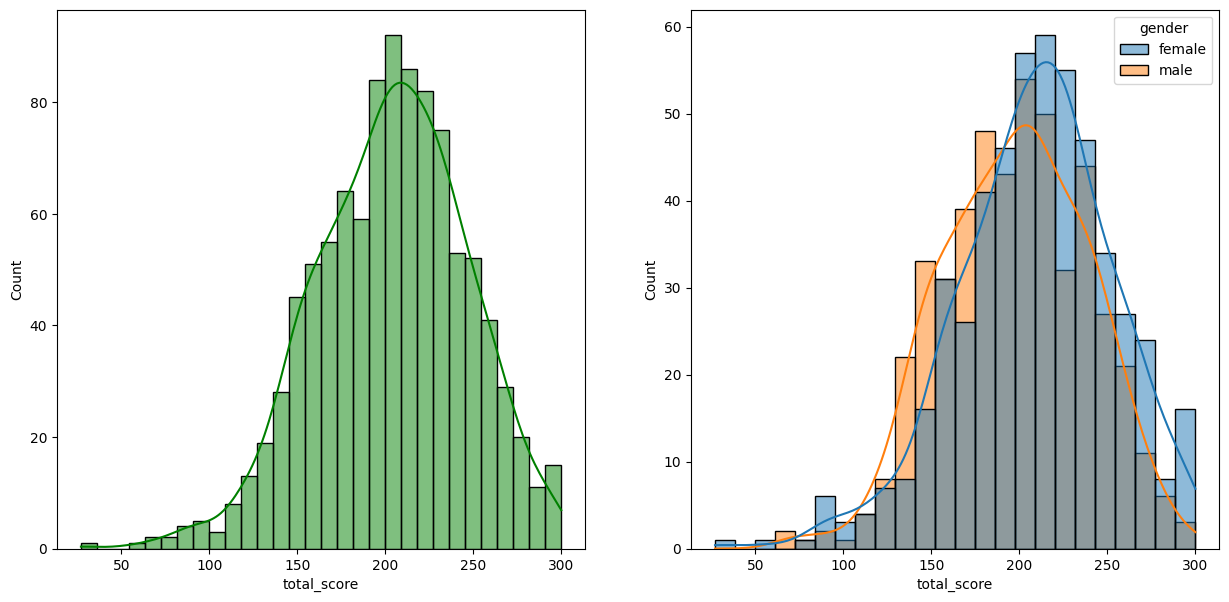

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

### Insight

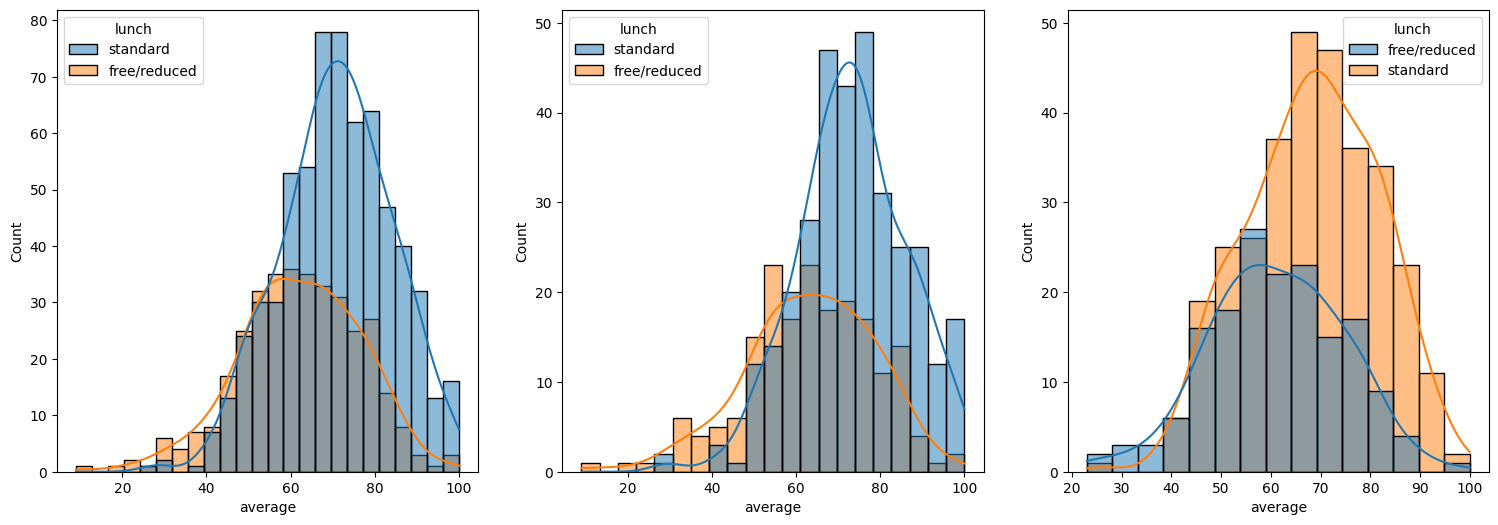

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

#### Insight

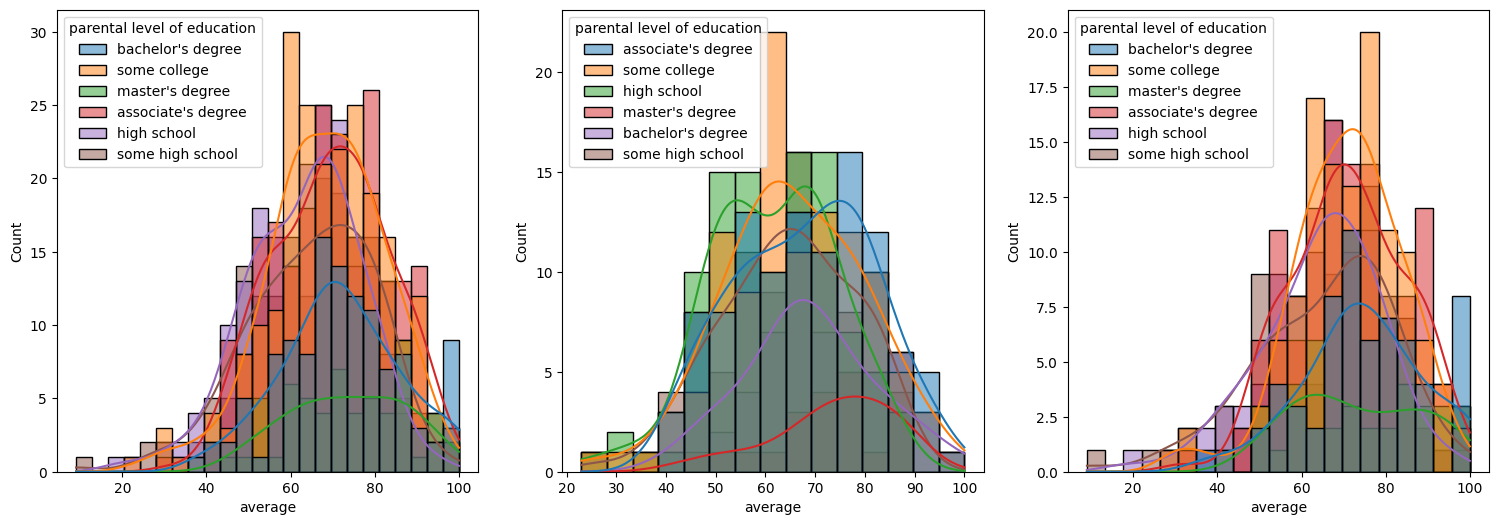

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

### Insight 

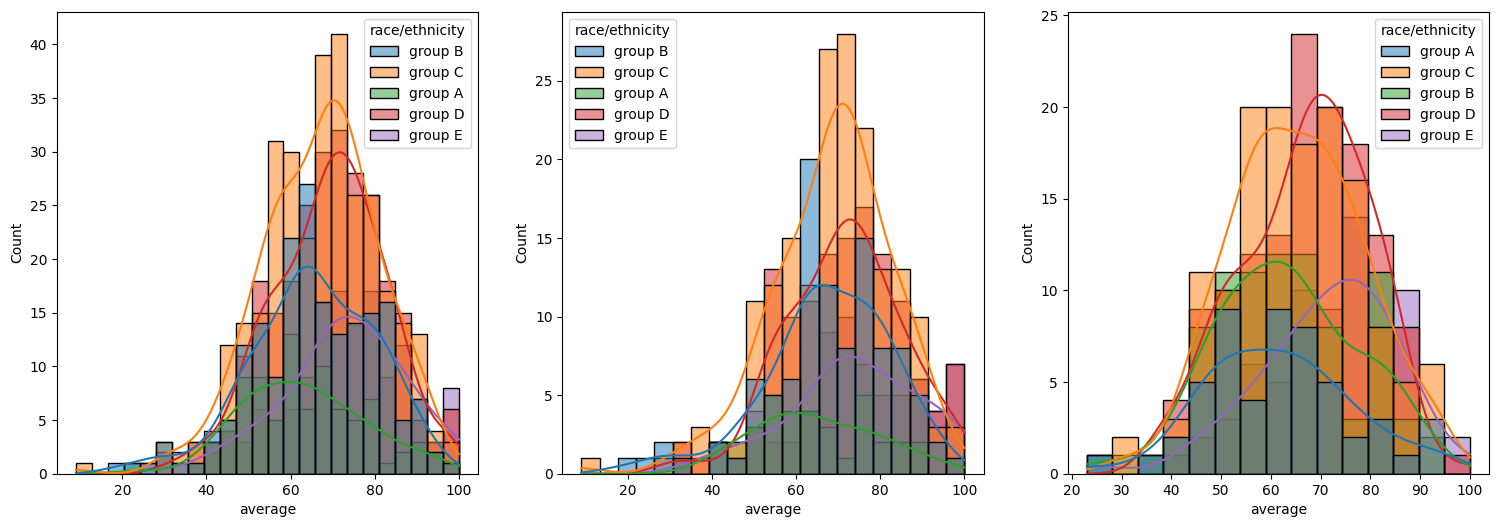

In [22]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

#### Insight

## 4.2 Maximumum score of students in all three subjects

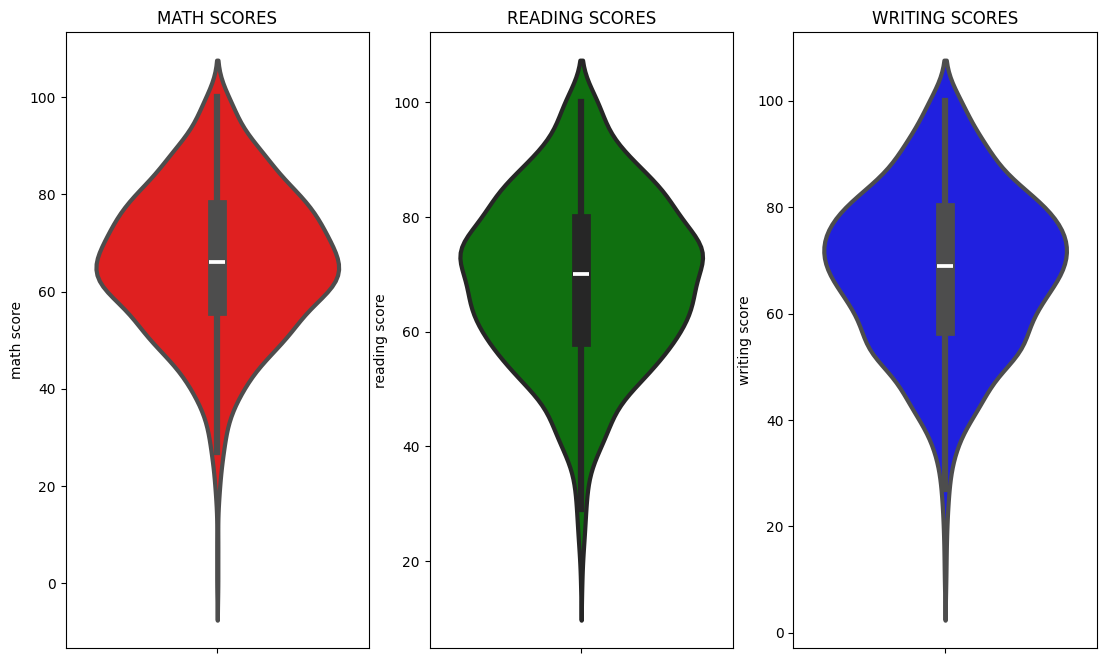

In [23]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

### Insight

## 4.3 Multivariate analysis using pieplot

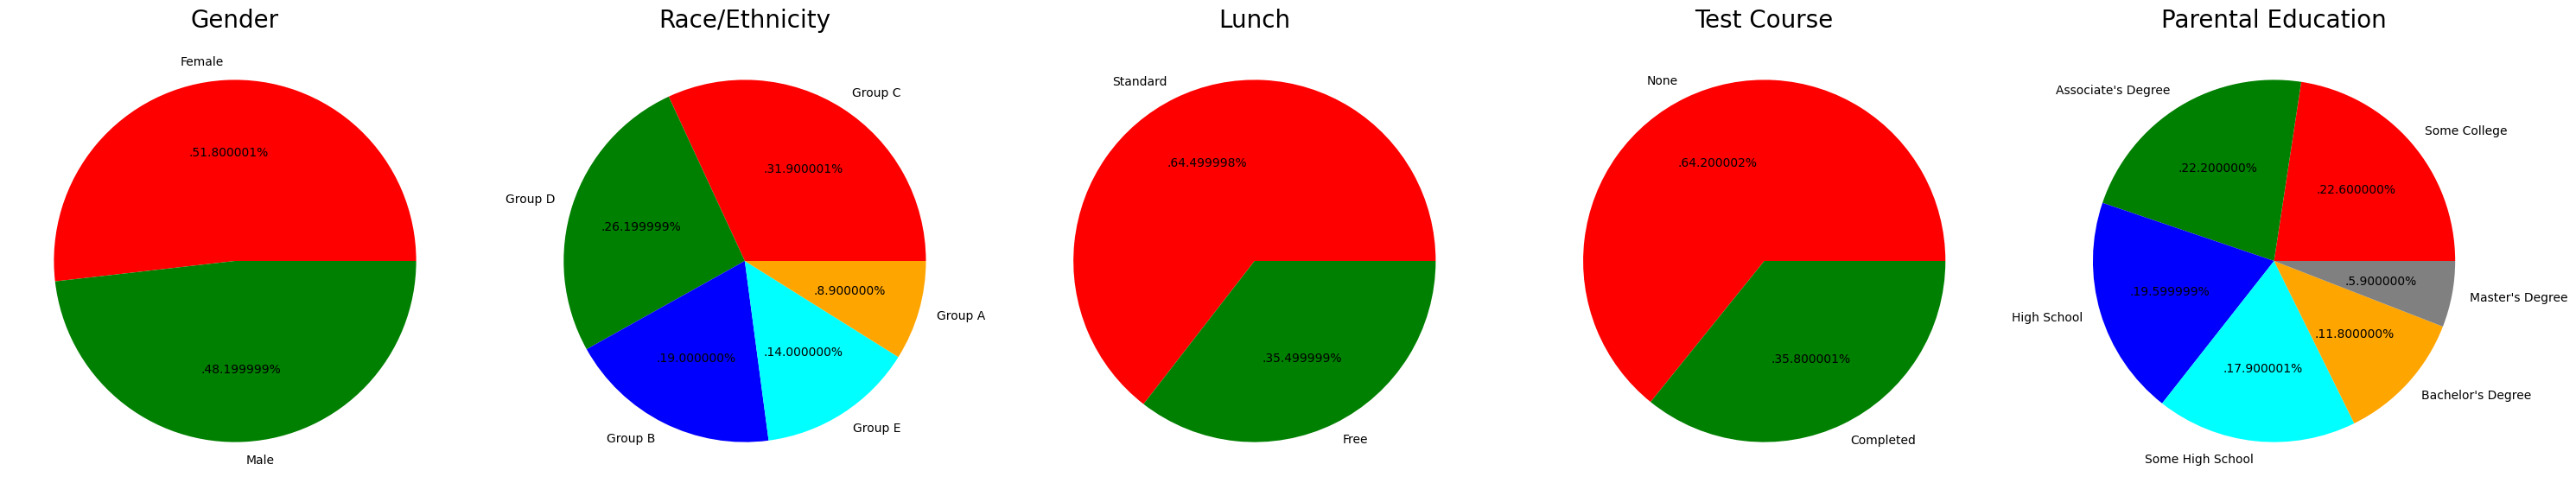

In [24]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

### Insight

## 4.4 Feature Wise Visualization

#### 4.4.1 GENDER COLUMN 

How is distribution of Gender ?
Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

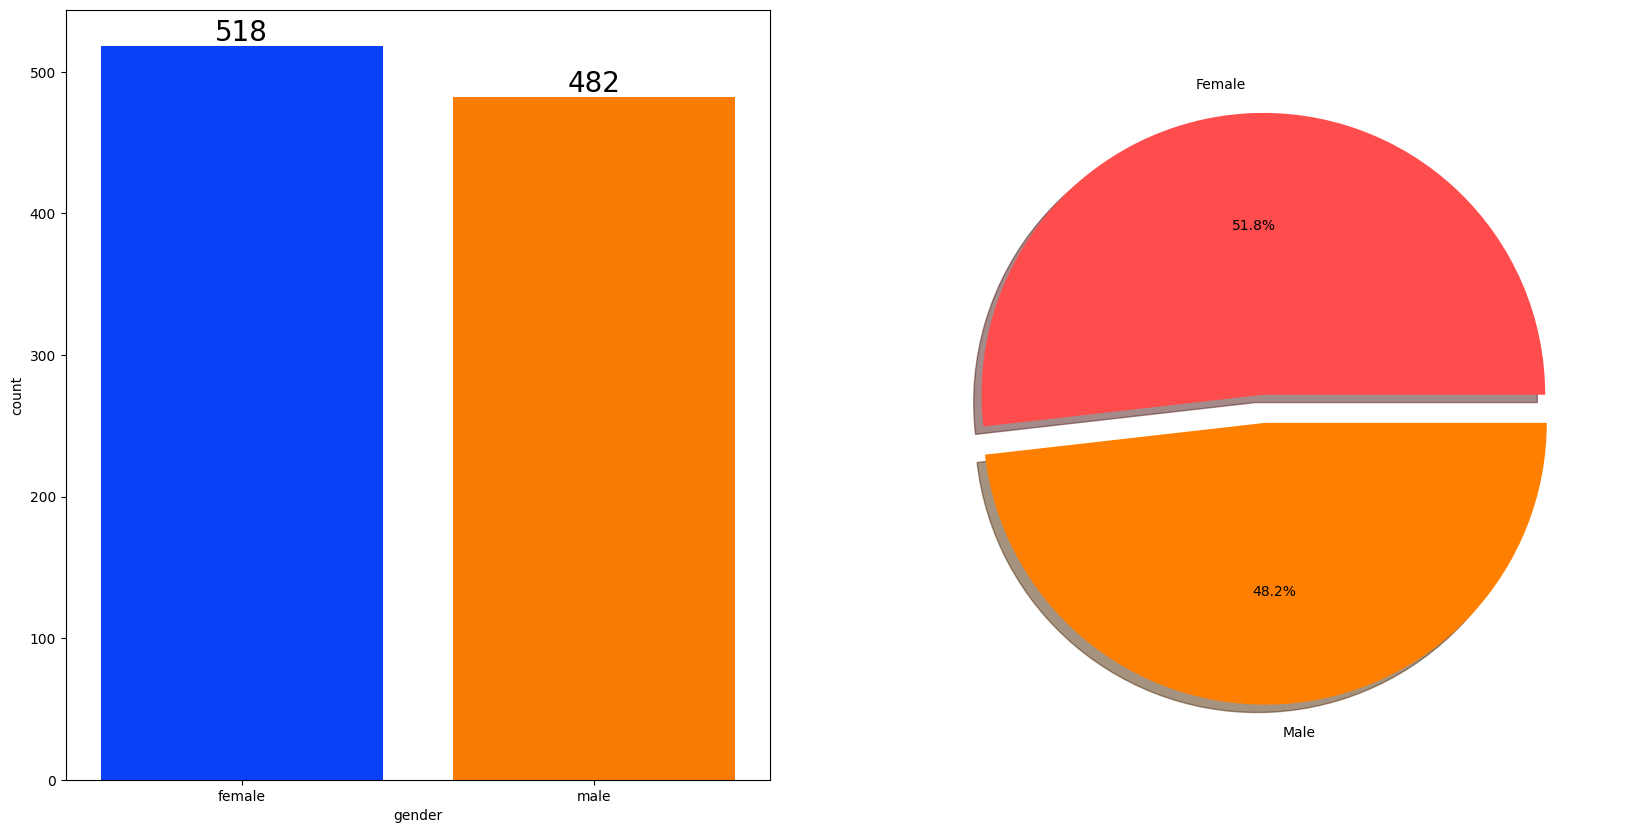

In [25]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Female','Male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

### insight

### RACE/EHNICITY COLUMN

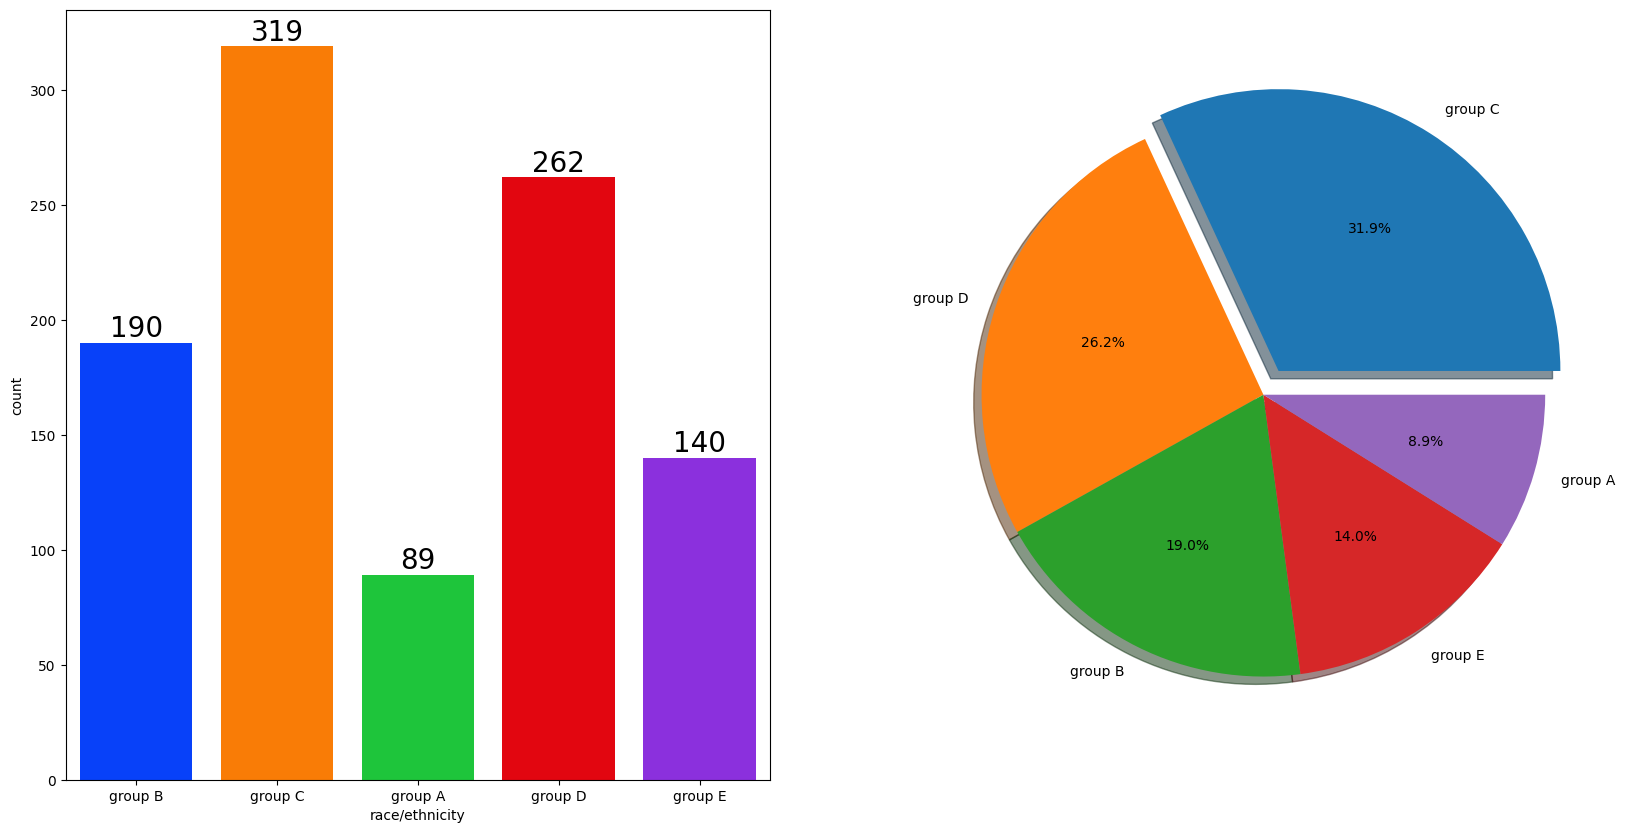

In [26]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   


#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

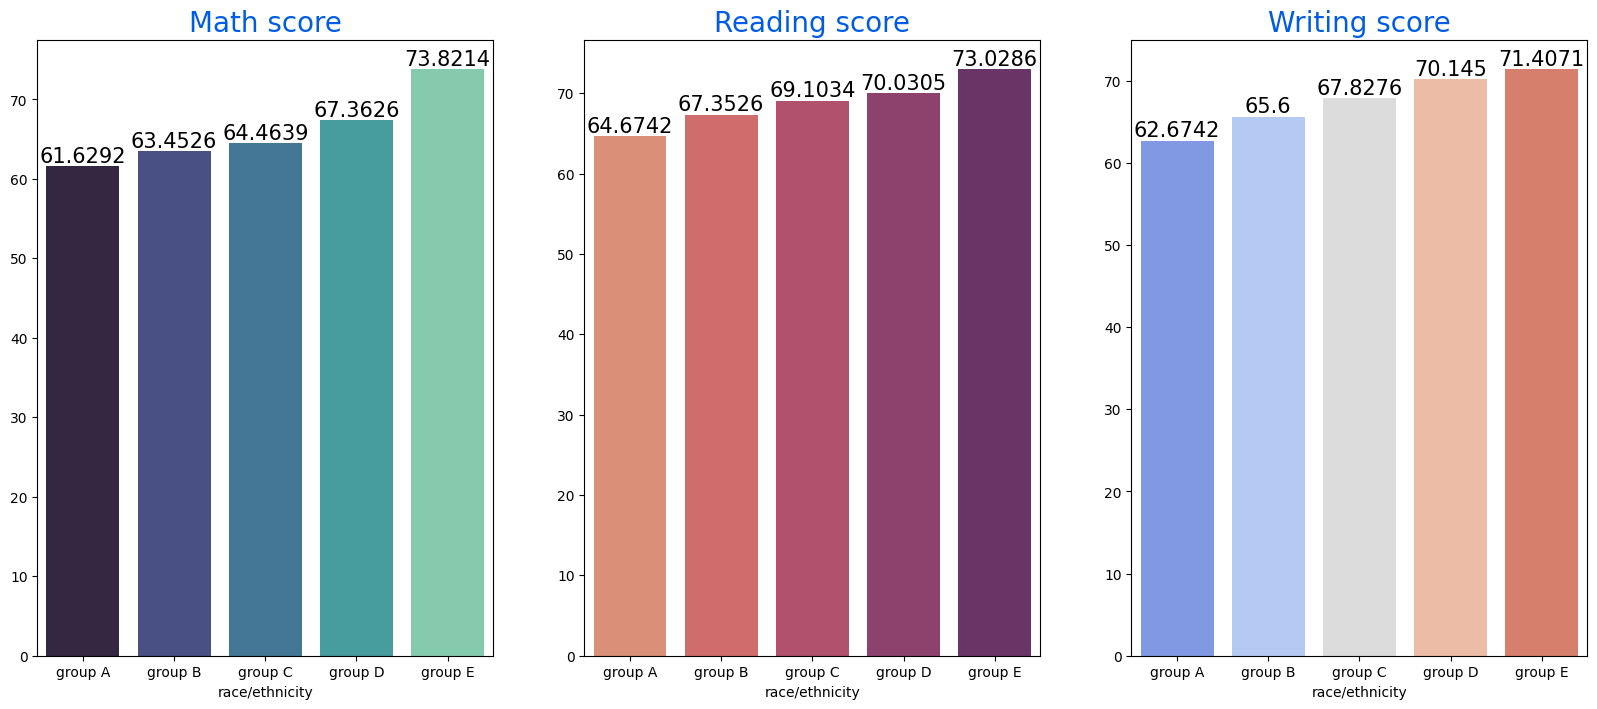

In [27]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)


## Insights
Students being served Standard lunch was more than free lunch
### BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

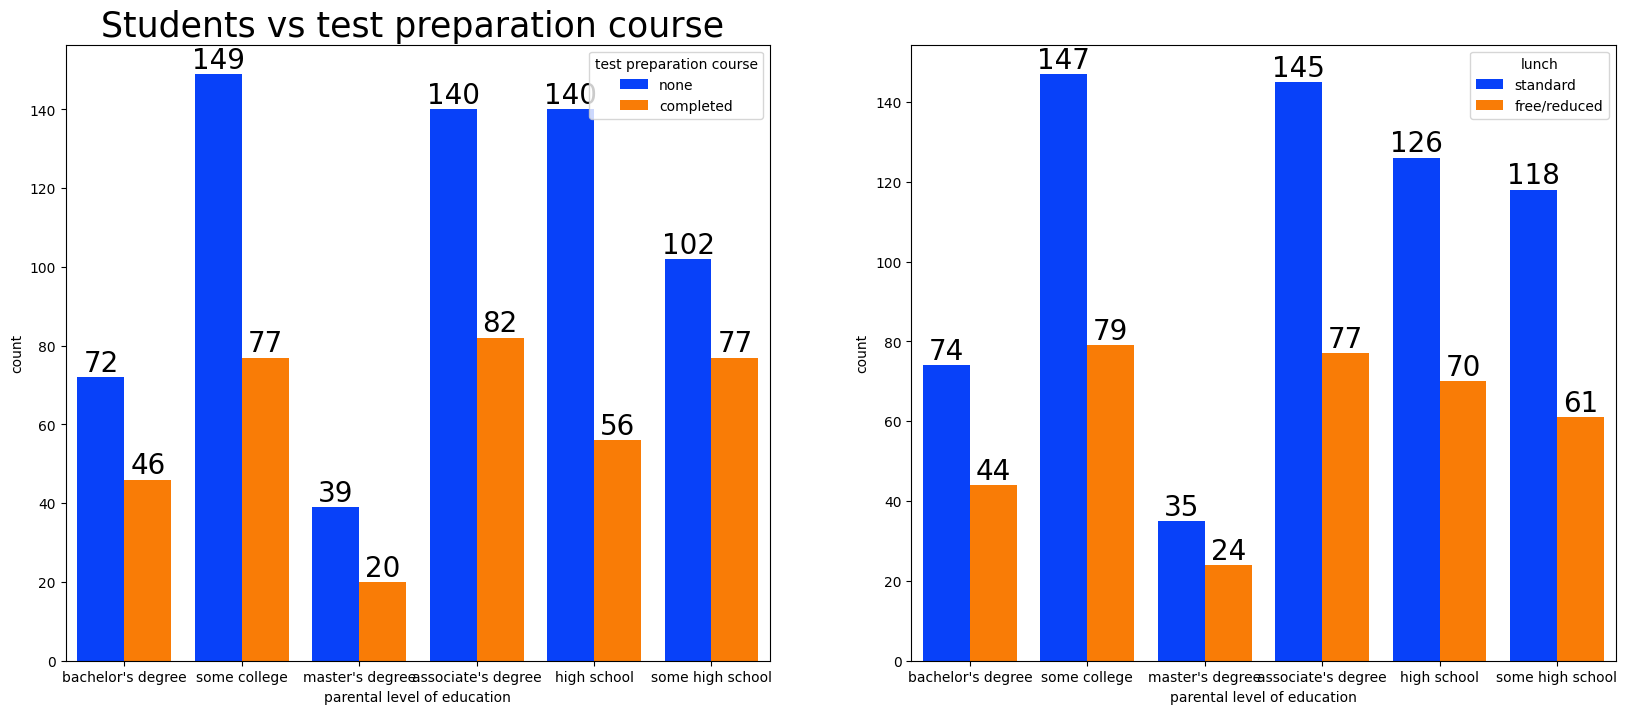

In [28]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

## Insights
Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

## TEST PREPARATION COURSE COLUMN
Which type of lunch is most common amoung students ?
Is Test prepration course has any impact on student's performance ?
### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing score'>

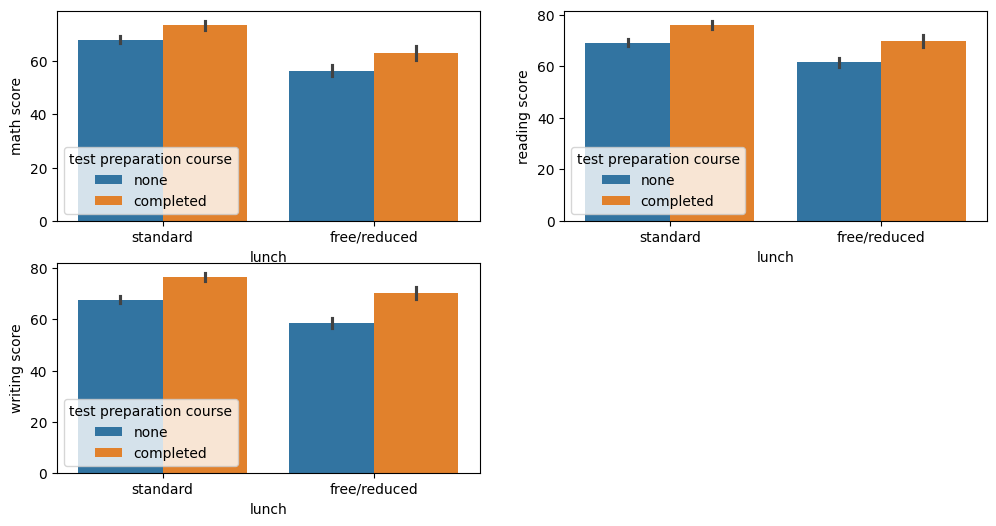

In [29]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

### Insights
Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course


#  CHECKING OUTLIERS

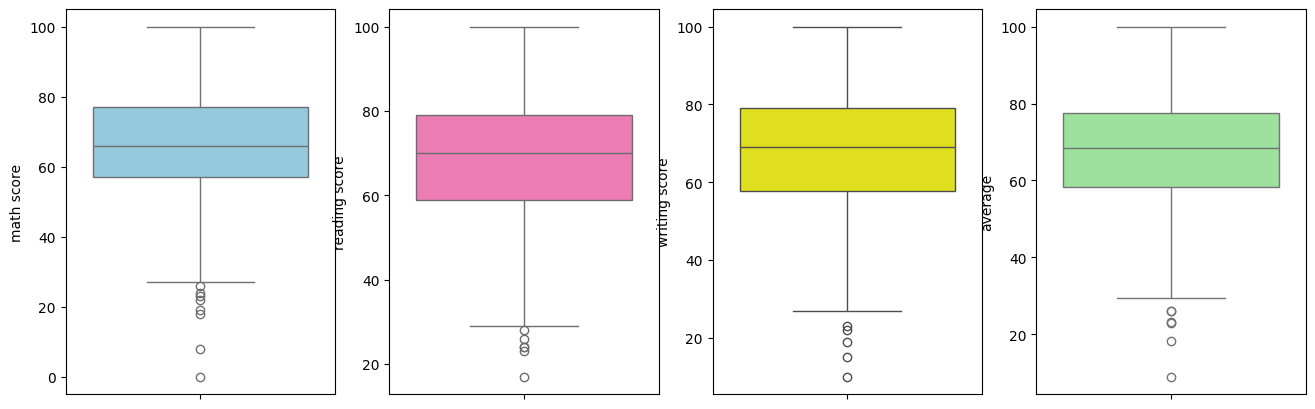

In [30]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

# MUTIVARIATE ANALYSIS USING PAIRPLOT

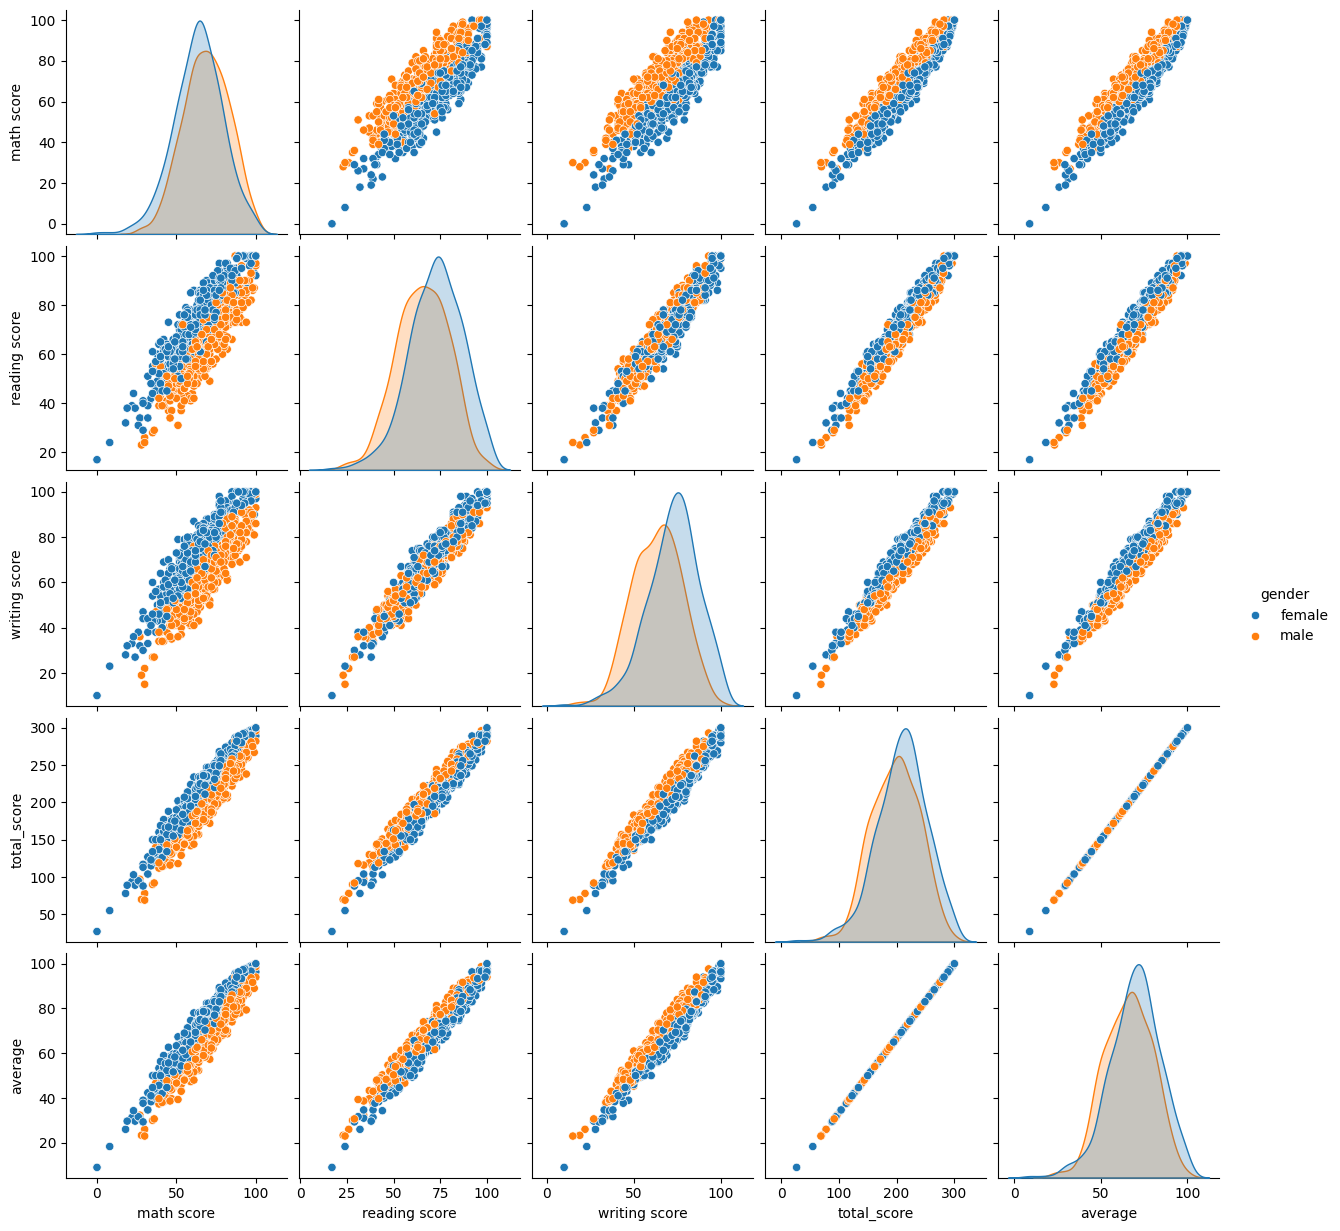

In [31]:
sns.pairplot(df,hue = 'gender')
plt.show()

## Insights
From the above plot it is clear that all the scores increase linearly with each other.

## 5. Conclusions
